In [ ]:
import ase
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from ase.neighborlist import NeighborList
import ensemble_analysis as ea
from tqdm import tqdm
import glob
import os

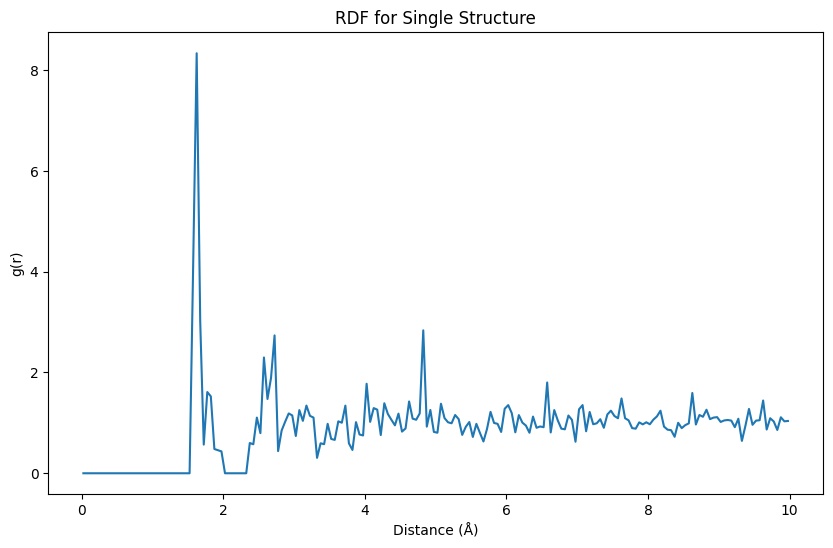

In [2]:
# Assuming you have a directory with POSCAR files
# 1. Calculate RDF for a single structure
file_path = '/Users/raphaelzstone/Documents/CMU/Research/Glass/1k_poscar/SiO2_24_0_iteration3.poscar'
atoms, _ = pea.read_poscar_with_energy(file_path)

# Basic RDF
r_values, g_r = pea.calculate_rdf(atoms, r_range=(0, 10), bins=200)

plt.figure(figsize=(10,6))
plt.plot(r_values, g_r)
plt.title('RDF for Single Structure')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.show()

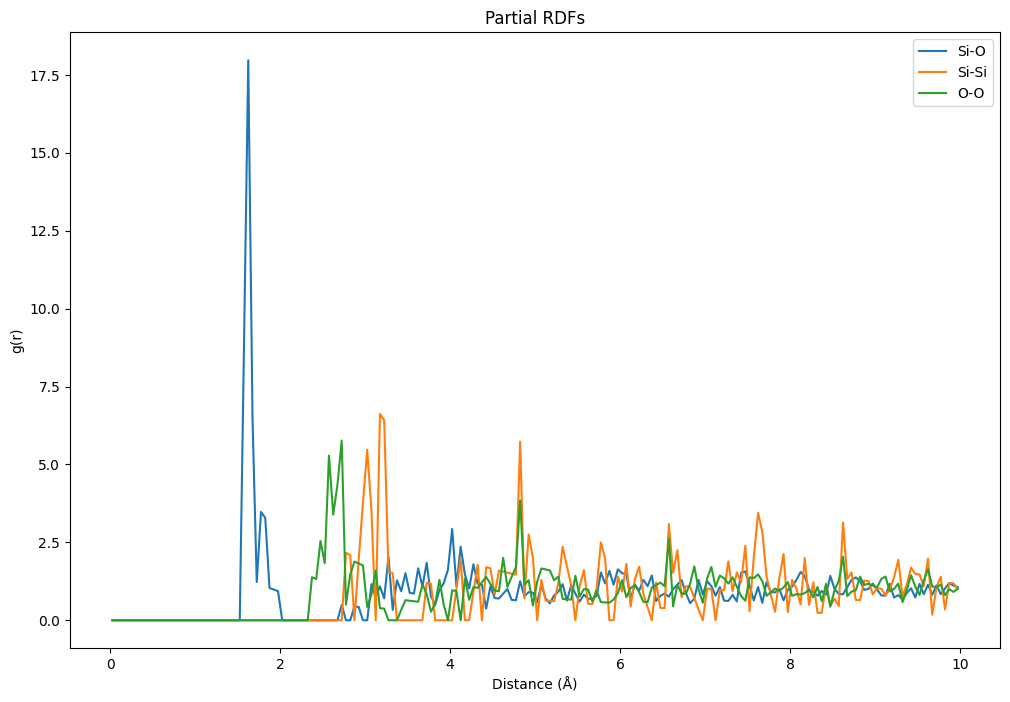

In [3]:

# 2. Calculate element-specific RDFs for a single structure
partial_rdfs = pea.calculate_partial_rdfs(
    atoms, 
    r_range=(0, 10), 
    bins=200, 
    element_pairs=[('Si', 'O'), ('Si', 'Si'), ('O', 'O')]
)

plt.figure(figsize=(12,8))
for (elem1, elem2), (r, rdf) in partial_rdfs.items():
    plt.plot(r, rdf, label=f'{elem1}-{elem2}')
plt.title('Partial RDFs')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.legend()
plt.show()


Found 108 files
Extracted energy -1042.96324822 from SiO2_24_163_iteration3.poscar
Extracted energy -1042.7111175 from SiO2_24_16_iteration3.poscar
Extracted energy -1042.78845799 from SiO2_24_105_iteration3.poscar
Extracted energy -1042.24661831 from SiO2_24_119_iteration3.poscar
Extracted energy -1042.13568349 from SiO2_24_157_iteration3.poscar
Extracted energy -1043.02202128 from SiO2_24_187_iteration3.poscar
Extracted energy -1042.30542446 from SiO2_24_131_iteration3.poscar
Extracted energy -1042.33668349 from SiO2_24_128_iteration3.poscar
Extracted energy -1042.36916389 from SiO2_24_166_iteration3.poscar
Extracted energy -1042.82213327 from SiO2_24_100_iteration3.poscar
Extracted energy -1042.46964135 from SiO2_24_13_iteration3.poscar
Extracted energy -1042.50565591 from SiO2_24_182_iteration3.poscar
Extracted energy -1042.74370998 from SiO2_24_152_iteration3.poscar
Extracted energy -1042.80215029 from SiO2_24_134_iteration3.poscar
Extracted energy -1042.77813772 from SiO2_24_162_

Calculating ensemble RDF: 100%|██████████| 108/108 [00:12<00:00,  8.91it/s]


R values shape: (200,)
Ensemble RDF shape: (200,)
Ensemble RDF min/max: 0.0 26.635494831640937


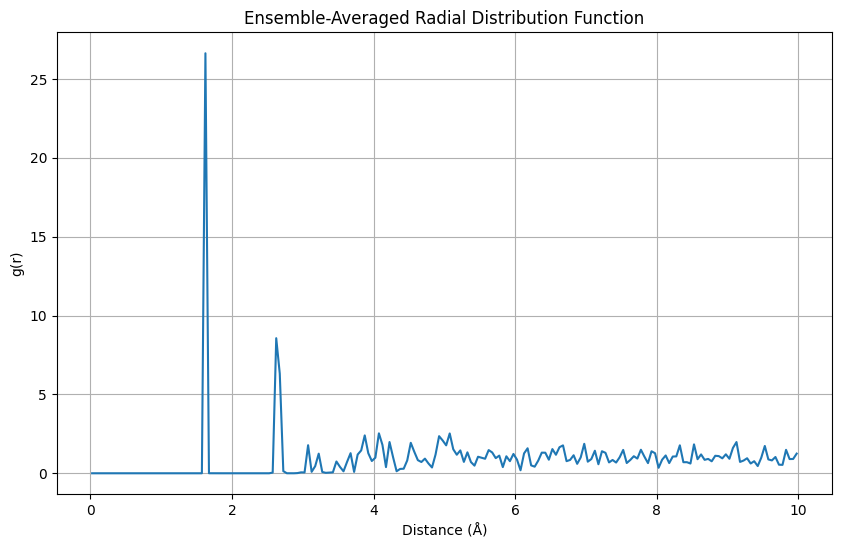

In [4]:
# First, get the list of files
file_pattern = '/Users/raphaelzstone/Documents/CMU/Research/Glass/1k_poscar/SiO2_24_1*.poscar'
# First, get the list of files
file_list = glob.glob(file_pattern)
print(f"Found {len(file_list)} files")

# Extract energies using read_poscar_with_energy
energies = {}
for file_path in file_list:
    try:
        # Read the structure and energy from the POSCAR file
        atoms, energy = pea.read_poscar_with_energy(file_path)
        
        if energy is not None:
            # Use the base filename as the key
            base_filename = os.path.basename(file_path)
            energies[base_filename] = energy
            print(f"Extracted energy {energy} from {base_filename}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print(f"Found {len(energies)} files with energies")

# Calculate weights
weights = pea.calculate_weights(energies, temperature=1800)



# Calculate and plot ensemble RDF
r_values, ensemble_rdf = pea.calculate_ensemble_rdf(
    file_list, 
    weights, 
    r_range=(0, 10), 
    bins=200
)

# Diagnostic prints
print("R values shape:", r_values.shape)
print("Ensemble RDF shape:", ensemble_rdf.shape)
print("Ensemble RDF min/max:", ensemble_rdf.min(), ensemble_rdf.max())

# Plot the RDF
plt.figure(figsize=(10, 6))
plt.plot(r_values, ensemble_rdf)
plt.title('Ensemble-Averaged Radial Distribution Function')
plt.xlabel('Distance (Å)')
plt.ylabel('g(r)')
plt.grid(True)
plt.show()

Found 108 files with energies
{'SiO2_24_163_iteration3.poscar': 0.010962840217392187, 'SiO2_24_16_iteration3.poscar': 0.009997774536567854, 'SiO2_24_105_iteration3.poscar': 0.010284408036128253, 'SiO2_24_119_iteration3.poscar': 0.008436749551867021, 'SiO2_24_157_iteration3.poscar': 0.008101527248281802, 'SiO2_24_187_iteration3.poscar': 0.011200873890316767, 'SiO2_24_131_iteration3.poscar': 0.008620039036837302, 'SiO2_24_128_iteration3.poscar': 0.00871908394525715, 'SiO2_24_166_iteration3.poscar': 0.00882320457178199, 'SiO2_24_100_iteration3.poscar': 0.010411767164949548, 'SiO2_24_13_iteration3.poscar': 0.009153237939163823, 'SiO2_24_182_iteration3.poscar': 0.009274514947998797, 'SiO2_24_152_iteration3.poscar': 0.010117579332490422, 'SiO2_24_134_iteration3.poscar': 0.010336002971323853, 'SiO2_24_162_iteration3.poscar': 0.010245689777423392, 'SiO2_24_17_iteration3.poscar': 0.011227342730095985, 'SiO2_24_104_iteration3.poscar': 0.01005121706275797, 'SiO2_24_156_iteration3.poscar': 0.00947

Calculating ensemble partial RDFs: 100%|██████████| 108/108 [00:18<00:00,  5.77it/s]


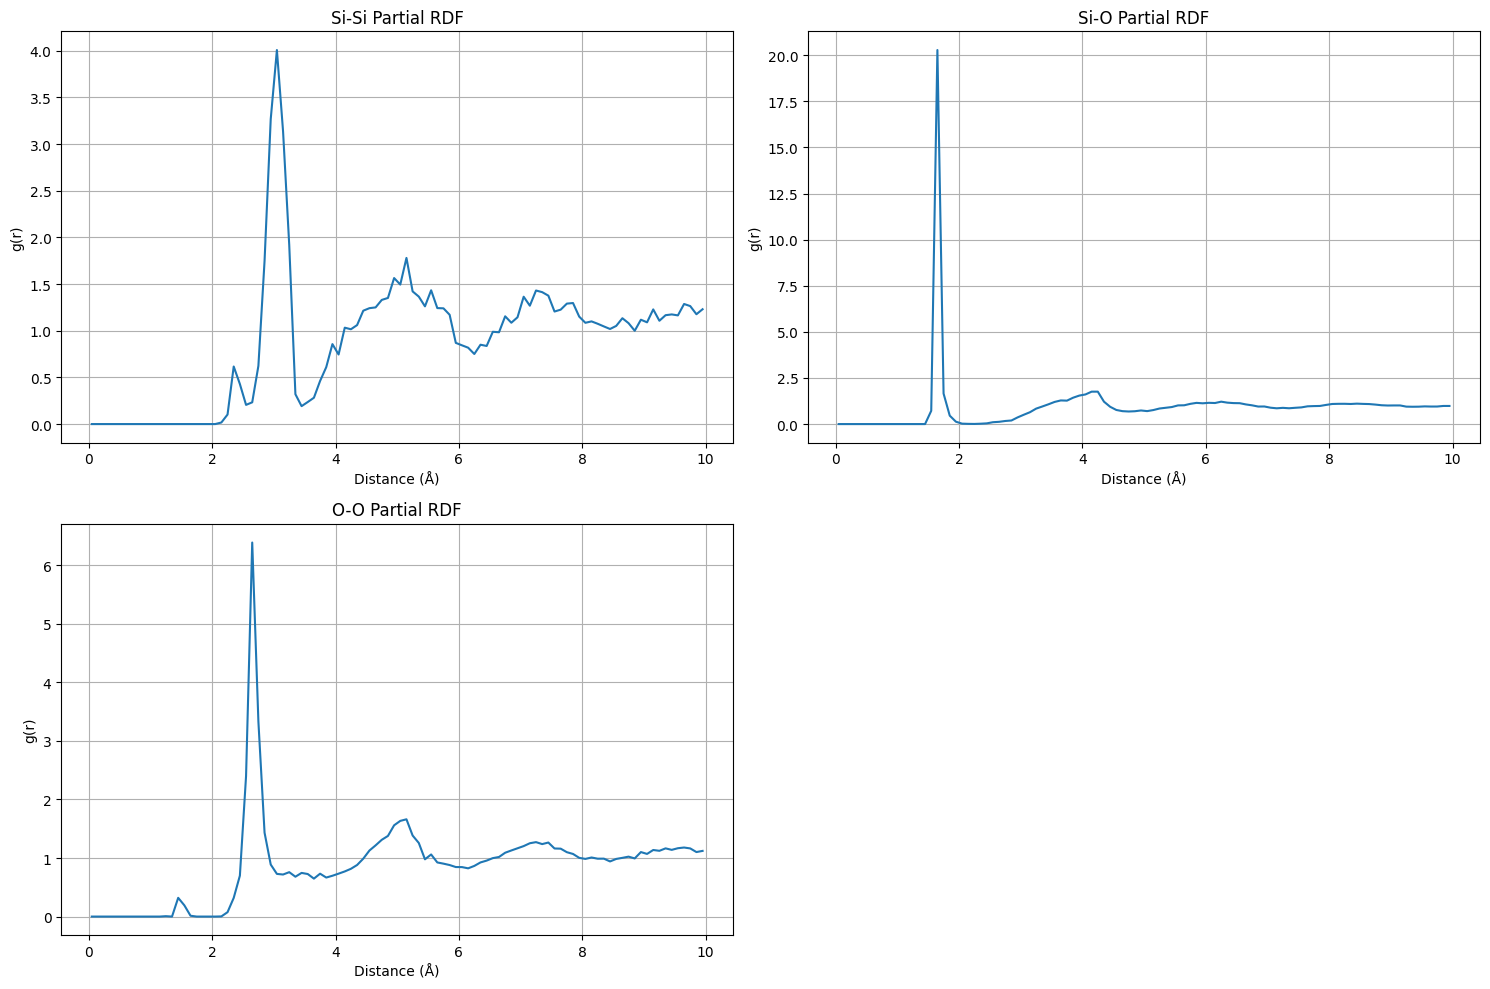

In [8]:
# Define parameters
file_list = glob.glob("/Users/raphaelzstone/Documents/CMU/Research/Glass/1k_poscar/SiO2_24_1*.poscar")  # Adjust the path pattern
# Extract energies using read_poscar_with_energy
energies = {}
for file_path in file_list:
    try:
        # Read the structure and energy from the POSCAR file
        atoms, energy = pea.read_poscar_with_energy(file_path)
        
        if energy is not None:
            # Use the base filename as the key
            base_filename = os.path.basename(file_path)
            energies[base_filename] = energy
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print(f"Found {len(energies)} files with energies")

weights = pea.calculate_weights(energies, temperature=18000)  # Assuming you have this function and energies
print(weights)
r_range = (0, 10)
bins = 100
element_pairs = [('Si', 'Si'), ('Si', 'O'), ('O', 'O')]

# Calculate ensemble partial RDFs
ensemble_partial_rdfs = pea.calculate_ensemble_partial_rdfs2(
    file_list, 
    weights, 
    r_range, 
    bins, 
    element_pairs
)

plt.figure(figsize=(15, 10))

# Iterate through the partial RDFs
for i, ((elem1, elem2), (r, rdf)) in enumerate(ensemble_partial_rdfs.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(r, rdf)
    plt.title(f'{elem1}-{elem2} Partial RDF')
    plt.xlabel('Distance (Å)')
    plt.ylabel('g(r)')
    plt.grid(True)

plt.tight_layout()
plt.show()